## Лабораторная работа 5.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [251]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
from statsmodels.tsa import api as tsa
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

## 2-3. Для начала попробуем создать собственные АРПСС ряды первого и второго порядков и изучить их автокорреляционные функции. Создадим два АР(1) процесса первого порядка:

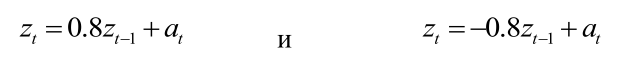

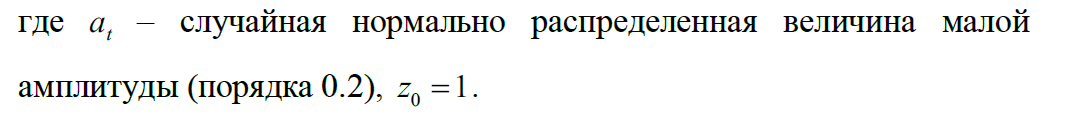

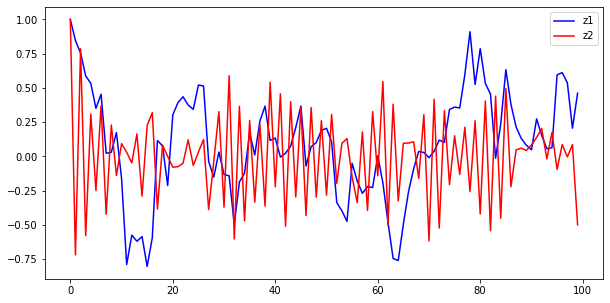

In [252]:
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1,100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn()
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn()
plt.figure(figsize = (10, 5))
plt.plot(z1, 'b', label='z1')
plt.plot(z2, 'r', label='z2')
plt.legend()
plt.show()

## 4. Постройте для этих рядов функции автокорреляции с помощью функции plot_acf:

## 5. Сравните эти графики между собой: найдите их сходства и различия, а также характерные особенности, которые позволяют отнести их к модели АР первого порядка:

## 6. Оцените весовой параметр этих процессов (как если бы Вы не знали о них) на основе функции автокорреляции. Также удостоверьтесь, что для модели АР(1) коэффициенты автокорреляции изменяются по степенному закону.

Значения АКФ z1:  [ 1.          0.78373686  0.60731153  0.48254271  0.39353108  0.23671183
  0.09703407 -0.01092716 -0.06017262 -0.14304134 -0.20237081 -0.21481192
 -0.21441155 -0.22682696 -0.21673406 -0.17440857 -0.07057958  0.0373713
  0.04578736  0.06042607  0.09462855]
Значения АКФ z2:  [ 1.         -0.80915295  0.68635668 -0.57294307  0.48225557 -0.46785457
  0.44297402 -0.41969975  0.39977045 -0.41770759  0.41685115 -0.38912577
  0.31587334 -0.28076133  0.27242297 -0.26708514  0.28839658 -0.27789427
  0.24866047 -0.26408783  0.26222272]


C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<Figure size 720x360 with 0 Axes>

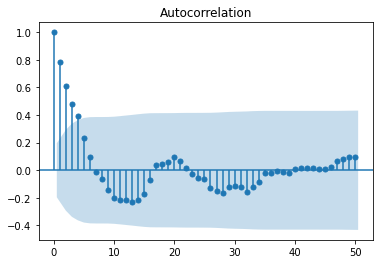

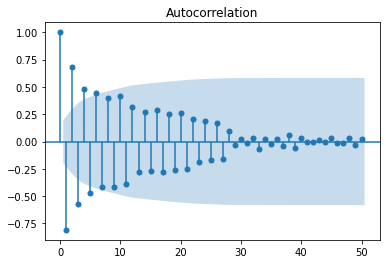

In [253]:
plt.figure(figsize = (10, 5))
plot_acf(z1, lags=50)
print('Значения АКФ z1: ', acf(z1,nlags=20)) 
plot_acf(z2, lags=50)
print('Значения АКФ z2: ', acf(z2,nlags=20)) 
plt.show()

### Если положительный коэффициент, то выглядит как экспоненциально убывающая прямая. Если отрицательный коэффициент, то наблюдается знакопеременная "треугольная" последовательность. Видим, что первый лаг имеет значение близкое к 0,8 (наш выборочный коэффициент).

## 7. Аналогичным образом постройте два СС(1) процесса среднего-скользящего первого порядка:

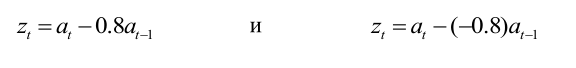

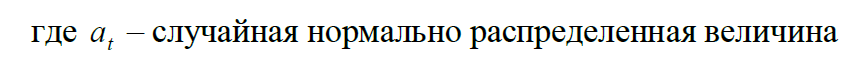

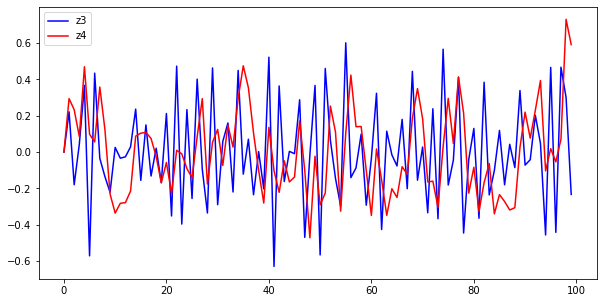

In [254]:
z3 = np.zeros(100)
z4 = np.zeros(100)
ar = 0.2 * np.random.randn(100)
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]
plt.figure(figsize = (10, 5))
plt.plot(z3, 'b', label='z3')
plt.plot(z4, 'r',label='z4')
plt.legend()
plt.show()

## 8. Постройте для этих рядов функции автокорреляции, достаточно взять 25 лагов (четверть от длины ряда):

<Figure size 720x360 with 0 Axes>

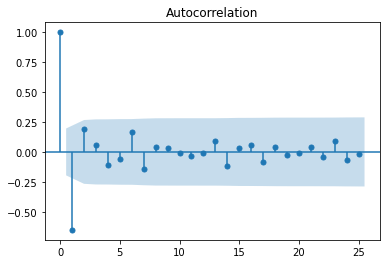

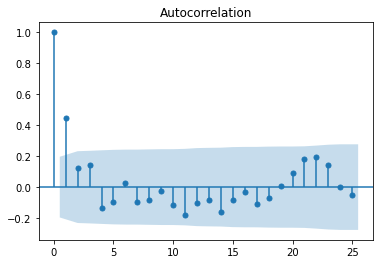

Значения АКФ z4:  [ 1.          0.44699385  0.12454723  0.14137512 -0.13525147 -0.09417346
  0.02861889 -0.09622695 -0.08627754 -0.02437364 -0.11792225 -0.17958621
 -0.10161901 -0.08106356 -0.16027111 -0.08577558 -0.03453426 -0.1099292
 -0.07268417  0.00634166  0.08897279]


C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [255]:
plt.figure(figsize = (10, 5))
plot_acf(z3, lags=25)
plot_acf(z4, lags=25)
plt.show()

print('Значения АКФ z4: ', acf(z4,nlags=20)) 

### 9. Сравните эти графики между собой: в случае скользящего среднего первого порядка, первый лаг вышел за границы доверительного интервала.

## 10-11. Оцените весовой параметр этих процессов (как если бы Вы не знали о них) с помощью формулы ниже, на основе функции автокорреляции, также удостоверьтесь, что для модели СС(1) коэффициенты автокорреляции соответствуют формуле.

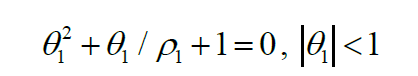

### По аналогии с предыдущим пунктом: пусть p1 = 0.44699385 (видно из АКФ), найдем theta:

In [259]:
print('По графику АКФ: ', np.roots ([1, 1/0.44699385, 1]))
print('Зная коэффициент: ', np.roots ([1, 1/0.44699385, 1]))

По графику АКФ:  [-1.61981144 -0.61735581]
Зная коэффициент:  [-1.61981144 -0.61735581]


### По формуле theta = -0.61735581

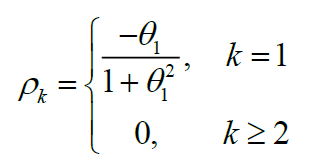

### Пусть k = 1

In [260]:
z4_acf = acf(z4, nlags=20)
print(z4_acf[1])
pk = 0.61735581 / (1+(0.61735581**2))
print(pk)

0.44699384600137504
0.4469938501907776


## 12-13. Наконец, создайте временной ряд процесса АРСС(1, 1). Постройте графики этих рядов и графики их автокорреляционных функций:

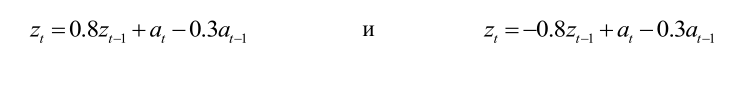

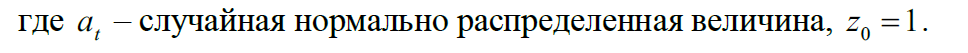

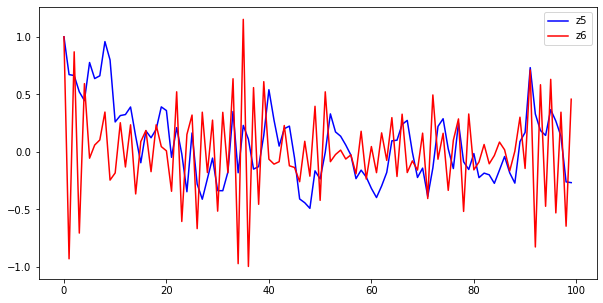

<Figure size 720x360 with 0 Axes>

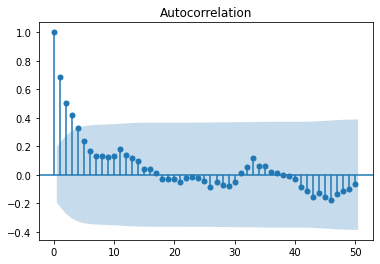

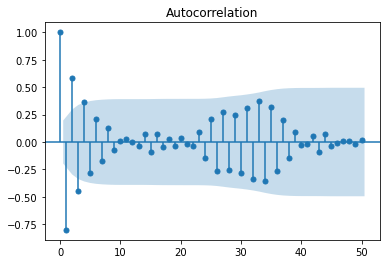

In [261]:
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0] = 1
z6[0] = 1
ar = 0.2 * np.random.randn(100)
for i in range(1,100):
    z5[i] =  0.8 * z5[i - 1] + ar[i] - 0.3*ar[i-1]
    z6[i] = -0.8 * z6[i - 1] + ar[i] - 0.3*ar[i-1]
plt.figure(figsize = (10, 5))
plt.plot(z5, 'b', label='z5')
plt.plot(z6, 'r',label='z6')
plt.legend()
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(z5, lags=50)
plot_acf(z6, lags=50)
plt.show()

## 14. Есть и другой, более высокоуровневый способ генерации рядов АРПСС. Используем следующую функцию для создания АРСС (2, 2):

In [262]:
from statsmodels.tsa.arima_process import arma_generate_sample
ar = np.array([0.75, -0.25]) # задаем коэффициенты АР
ma = np.array([0.65, 0.35]) # задаем коэффициенты СС
y = arma_generate_sample(np.r_[1, -ar], np.r_[1, ma], 100)
# создаем ВР для АРСС (2, 2) = АРПСС (2, 0, 2) из 100 отсчетов

## 15-16-17. Теперь проведем анализ неизвестного ряда на типовом примере (значения исходного ряда (всего их 24) приведены ниже). Постройте график ВР и его АКФ:

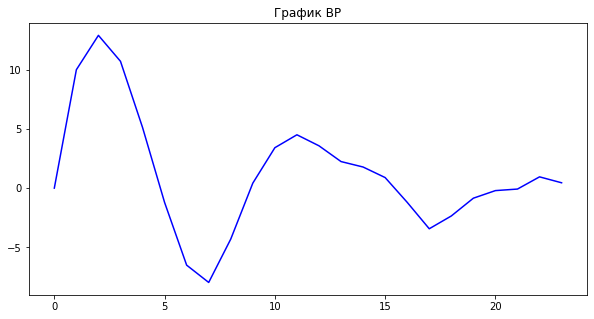

<Figure size 720x360 with 0 Axes>

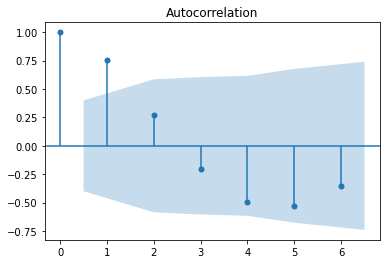

In [263]:
TEST = [0.00, 9.99, 12.89, 10.70, 5.12, -1.21, -6.50, -7.96, -4.30, 0.42, 3.41, 4.50, 3.57, 2.24, 1.78, 0.89, -1.20, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45]

plt.figure(figsize = (10, 5))
plt.plot(TEST, 'b')
plt.title('График ВР')
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(TEST, lags=6)
plt.show()

## 18. Можно судить, что ВР, в достаточной степени, стационарен, а, так как, эта функция является знакопеременной, то один из членов АР модели имеет отрицательный вес.

## 19-20. Создадим три пробные модели АРПСС для проверки ряда на АР(1) = АРПСС(1, 0, 0), АР(2), АР(3), без тренда (trend = ‘nc’). Будут выведены три таблицы со всевозможной информацией:

In [264]:
arima1 = ARIMA(TEST, order = (1, 0, 0)) # создаем модель
model_fit1 = arima1.fit(disp = False, trend='nc') # подгоняем под ВР
print(model_fit1.summary()) # выводим таблицу результатов

arima2 = ARIMA(TEST, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(TEST, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -62.425
Method:                       css-mle   S.D. of innovations              3.207
Date:                Mon, 25 Apr 2022   AIC                            128.850
Time:                        16:25:54   BIC                            131.206
Sample:                             0   HQIC                           129.475
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7426      0.123      6.053      0.000       0.502       0.983
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

## 21-22-23-24. В этой таблице значения коэффициентов модели авторегрессии АР(2) написаны в столбце coef. СКВО их расчета – в следующем столбце.

### Как по этим таблицам выбрать наилучшую модель? Во- первых, стоит обратить внимание на значение AIC – информационный критерий Акаике, который показывает максимальное правдоподобие модели при штрафовании за избыточные параметры системы. Считается, что наилучшей будет модель с наименьшим значением критерия AIC.

### Аналогично есть BIC – Байесовский информационный критерий, модификация AIC. Данный критерий налагает больший штраф на увеличение количества параметров по сравнению с AIC.

### Аналогично есть HQIC –информационный критерий Ханнана-Куинна (Hannan-Quinn), который асимптотически более точный метод чем BIC для дискретных параметров.

## 25. В любом случае, лучшей моделью будет та, что имеет наименьшее значение информационного критерия среди множества других. Рекомендуется, в первую очередь, выбирать по критерию BIC, так как он сильнее "штрафует" за переобучение модели и увеличение числа параметров по сравнению с другими. В нашем случае для тестового ВР, для любых информационных критериев, это модель АР(2).

## 26. Другим методом выбора модели может служить построение моделей АРПСС выбранного порядка и с найденными коэффициентам на графиках совмещенно:

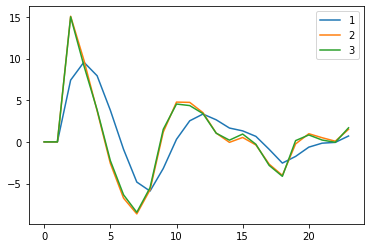

In [265]:
plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

<Figure size 720x360 with 0 Axes>

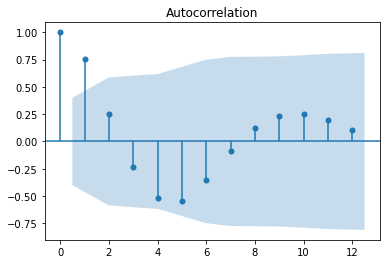

<Figure size 1440x360 with 0 Axes>

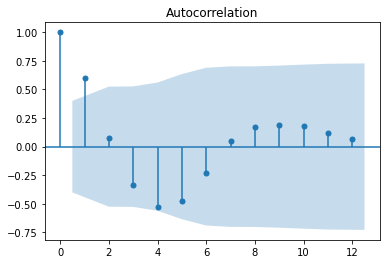

In [266]:
plt.figure(figsize = (10, 5))
plot_acf(model_fit1.fittedvalues, lags=12)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit2.fittedvalues, lags=12)
plt.show()

## 27. Теперь попробуйте найти весовые коэффициенты для АР моделей только 1 и 2 порядка самостоятельно. Для этого Вам потребуется построить автокорреляционную функцию этого ряда.

## 28-29. Будем использовать следующие формулы:

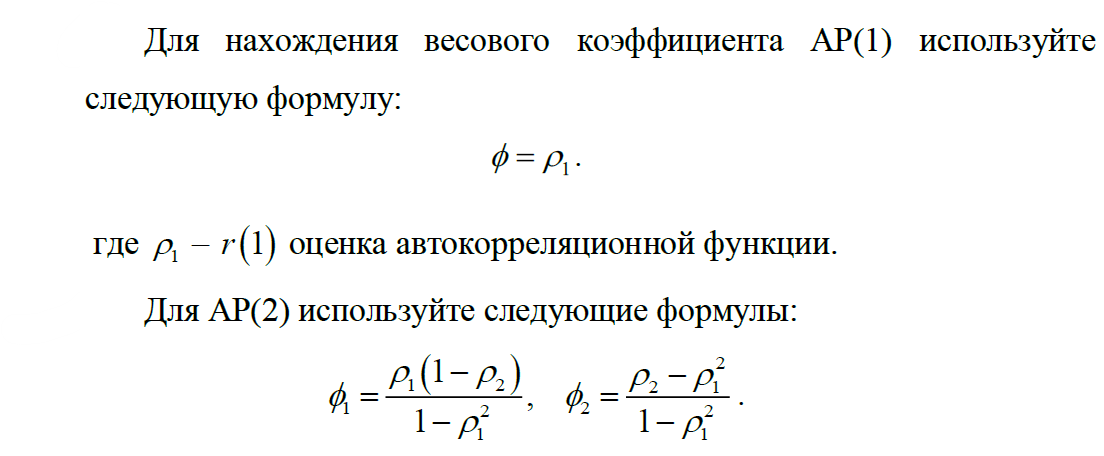

In [267]:
fi =0.755 # Весовой коэффициент для АР моделей первого порядка

In [268]:
p1=0.755
p2=0.2725
fi1 = (p1*(1-p2))/(1-p1**2)
fi2 = (p2-p1**2)/(1-p1**2)

print('Весовые коэффициенты для АР моделей второго порядка: ')
print(fi1)
print(fi2)

Весовые коэффициенты для АР моделей второго порядка: 
1.2774289202860631
-0.6919588348159776


## 30. Мы убедились, что полученные веса близки к тем, что были получены с помощью функций Python.

## 31-32. Теперь в зависимости от своего варианта, который определен как "подгруппа задания (вариант): 3", выберите из выданных преподавателей mat-файлов тот, который имеет номер вашего варианта и загрузите из него временной ряд Z. Постройте график ВР и его автокорреляционную функцию:

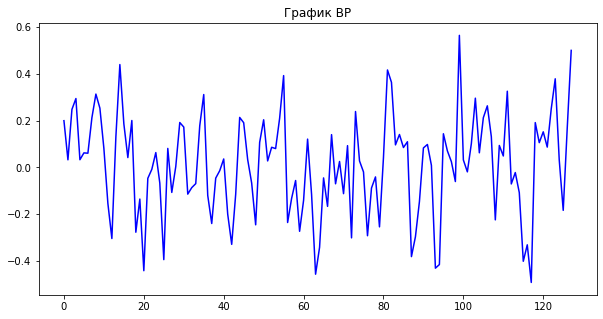

<Figure size 720x360 with 0 Axes>

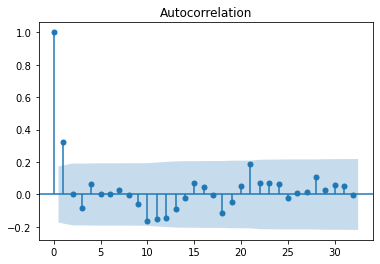

In [269]:
file = h5py.File('3.mat', 'r')
data = file.get('z3')
Z = np.array(data)

plt.figure(figsize = (10, 5))
plt.plot(Z, 'b')
plt.title('График ВР')
plt.show()

plt.figure(figsize = (10, 5))
plot_acf(Z, lags=32)
plt.show()

## 33. Оцените порядок АРСС модели с помощью класса ARIMA. Для упрощения задачи выбора модели используйте только чистые АР или СС модели, то есть класс ARIMA c order = (p, 0, 0) или order = (0, 0, q):

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(1, 0)   Log Likelihood                  22.298
Method:                       css-mle   S.D. of innovations              0.203
Date:                Mon, 25 Apr 2022   AIC                            -40.596
Time:                        16:25:58   BIC                            -34.892
Sample:                             0   HQIC                           -38.279
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3373      0.085      3.965      0.000       0.171       0.504
                                    Roots                                    
                  Real          Imaginary           M

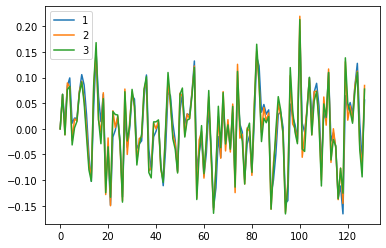

In [270]:
arima1 = ARIMA(Z, order = (1, 0, 0))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (2, 0, 0))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (3, 0, 0))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

## 34. Выберите модель с наиболее подходящей структурой и вычислите для нее коэффициенты. Поясните в отчете выбор модели.

### Выбираем АР(1) (имеет наименьший параметр BIC):

## 35. В дальнейшем попробуйте подобрать такую модель АРПСС (ARIMA) со всевозможными параметрами order = (p, d, q), которая будет наилучшей для данного ВР среди всех других по одному из информационных критериев.

<Figure size 720x360 with 0 Axes>

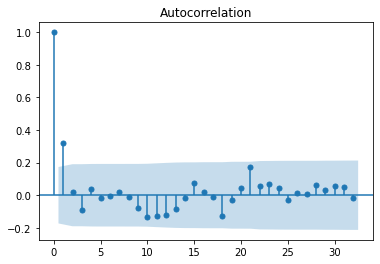

<Figure size 1440x360 with 0 Axes>

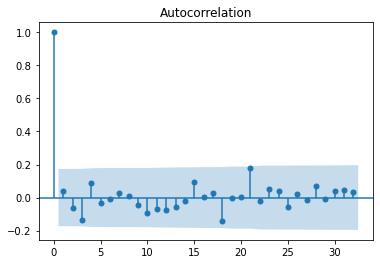

<Figure size 1440x360 with 0 Axes>

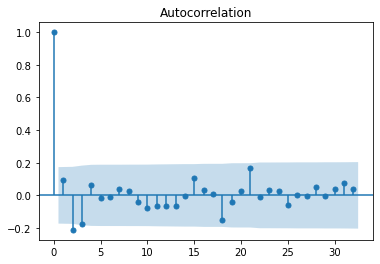

In [271]:
plt.figure(figsize = (10, 5))
plot_acf(model_fit1.fittedvalues, lags=32)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit2.fittedvalues, lags=32)
plt.show()

plt.figure(figsize = (20, 5))
plot_acf(model_fit3.fittedvalues, lags=32)
plt.show()

### Коэффициенты в значениях лагов АКФ:

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                  22.512
Method:                       css-mle   S.D. of innovations              0.203
Date:                Mon, 25 Apr 2022   AIC                            -41.025
Time:                        16:25:59   BIC                            -35.321
Sample:                             0   HQIC                           -38.707
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3307      0.074      4.476      0.000       0.186       0.476
                                    Roots                                    
                  Real          Imaginary           M

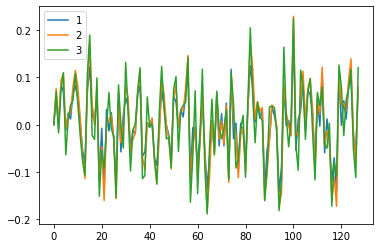

In [272]:
arima1 = ARIMA(Z, order = (0, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (0, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (0, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(0, 1)   Log Likelihood                  22.512
Method:                       css-mle   S.D. of innovations              0.203
Date:                Mon, 25 Apr 2022   AIC                            -41.025
Time:                        16:25:59   BIC                            -35.321
Sample:                             0   HQIC                           -38.707
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.3307      0.074      4.476      0.000       0.186       0.476
                                    Roots                                    
                  Real          Imaginary           M

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(2, 1)   Log Likelihood                  23.255
Method:                       css-mle   S.D. of innovations              0.202
Date:                Mon, 25 Apr 2022   AIC                            -38.511
Time:                        16:26:00   BIC                            -27.103
Sample:                             0   HQIC                           -33.876
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5299      0.426      1.244      0.214      -0.305       1.365
ar.L2.y       -0.1739      0.160     -1.086      0.277      -0.488       0.140
ma.L1.y       -0.1548      0.426     -0.364      0.7

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 1)   Log Likelihood                  24.183
Method:                       css-mle   S.D. of innovations              0.199
Date:                Mon, 25 Apr 2022   AIC                            -38.365
Time:                        16:26:00   BIC                            -24.105
Sample:                             0   HQIC                           -32.571
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        1.3430      0.090     14.883      0.000       1.166       1.520
ar.L2.y       -0.4760      0.144     -3.306      0.001      -0.758      -0.194
ar.L3.y        0.0909      0.090      1.009      0.3

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 2)   Log Likelihood                  25.346
Method:                       css-mle   S.D. of innovations              0.198
Date:                Mon, 25 Apr 2022   AIC                            -38.693
Time:                        16:26:00   BIC                            -21.581
Sample:                             0   HQIC                           -31.740
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6247      0.338     -1.847      0.065      -1.288       0.038
ar.L2.y       -0.2395      0.231     -1.036      0.300      -0.693       0.214
ar.L3.y       -0.0114      0.161     -0.071      0.9

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(3, 3)   Log Likelihood                  26.291
Method:                       css-mle   S.D. of innovations              0.196
Date:                Mon, 25 Apr 2022   AIC                            -38.581
Time:                        16:26:01   BIC                            -18.617
Sample:                             0   HQIC                           -30.470
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.3359      0.267      1.256      0.209      -0.188       0.860
ar.L2.y        0.3748      0.305      1.230      0.219      -0.223       0.972
ar.L3.y        0.1879      0.201      0.933      0.3

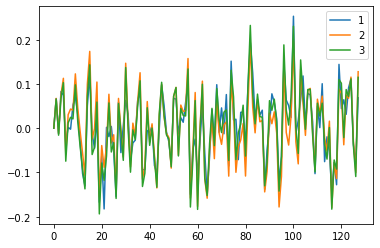

In [273]:
arima1 = ARIMA(Z, order = (0, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (0, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (0, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())

arima1 = ARIMA(Z, order = (1, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (1, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima1 = ARIMA(Z, order = (2, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (2, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima1 = ARIMA(Z, order = (3, 0, 1))
model_fit1 = arima1.fit(disp = False, trend='nc')
print(model_fit1.summary())

arima2 = ARIMA(Z, order = (3, 0, 2))
model_fit2 = arima2.fit(disp = False, trend='nc')
print(model_fit2.summary())

arima3 = ARIMA(Z, order = (3, 0, 3))
model_fit3 = arima3.fit(disp = False, trend='nc')
print(model_fit3.summary())



plt.plot(model_fit1.fittedvalues, label='1')
plt.plot(model_fit2.fittedvalues, label='2')
plt.plot(model_fit3.fittedvalues, label='3')
plt.legend()
plt.show()

### Выбираем arima1 order = (0, 0, 1) (имеет наименьший параметр BIC).

## 36. Теперь обратимся к прогнозированию на основе АРПСС моделей. Загрузите из mat-файла Fort.mat ряд, содержащий отсчеты некоторого реального ВР, всего 174 отсчета в вектор-строке:

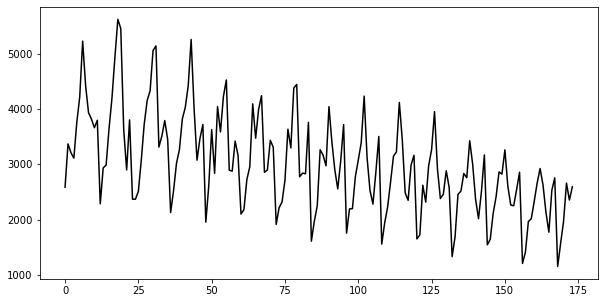

In [274]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.show()

## 37. Мы будем производить ретроспективный прогноз, аналогично предыдущей лабораторной работе. Для этого отрежем от данного ряда последние 24 точки (которые мы и будем прогнозировать):

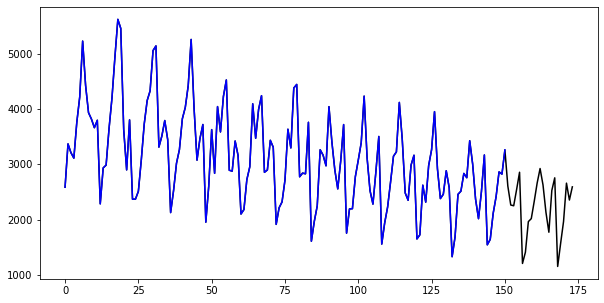

In [275]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t=np.arange(0, len(Z), 1) # временная шкала для регрессии
t=t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

### 38. Прежде, чем строить модель АРПСС, обратите внимание: модели АРПСС строятся для рядов с около-нулевым средним, что неверно для заданного временного ряда. Поэтому – сначала постройте линейный тренд прогнозируемого ряда (см. линейную регрессию первого порядка из предыдущей лаб. работы), а затем вычтите его из исходного ряда, приведя его к нулевому среднему значению (к так называемой тренд-стационарной форме).

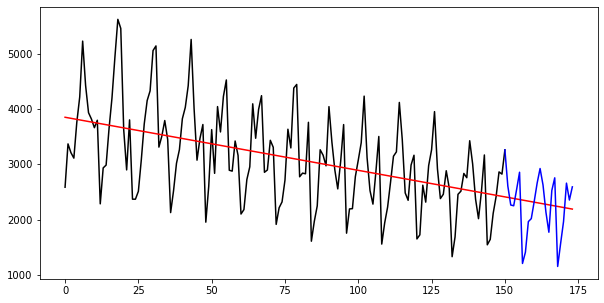

In [276]:
t=np.arange(0, len(Z), 1) # диапазон урезанного ряда
t=t.reshape(-1,1)
t0=np.arange(0, len(Fort), 1) # диапазон полного ряда
t0=t0.reshape(-1,1)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

In [277]:
Z_minus_trend = Z - reg.predict(t0)[:len(Fort)-24+1]

### 39. Подберите для данного приведенного к нулю ВР, у которого к тому же отрезали последние 24 точки, модель АРПСС (p, d, q) некоторого порядка (все параметры целиком и полностью определяются самим студентом) по таблицам и информационным критериям. Например, была найдена некоторая наилучшая модель:

In [278]:
arimaz = ARIMA(Z_minus_trend, order = (10, 0, 0))
model_fit = arimaz.fit(disp = False) # подгоняем под ВР
print(model_fit.summary())

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                    ARMA(10, 0)   Log Likelihood               -1134.311
Method:                       css-mle   S.D. of innovations            434.656
Date:                Mon, 25 Apr 2022   AIC                           2292.621
Time:                        16:26:04   BIC                           2328.829
Sample:                             0   HQIC                          2307.331
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8882     10.203      0.577      0.564     -14.109      25.886
ar.L1.y        0.1049      0.074      1.410      0.158      -0.041       0.251
ar.L2.y       -0.4077      0.074     -5.507      0.0

## 40. Тогда график прогноза по данной модели вместе с доверительными интервалами строится очень легко:

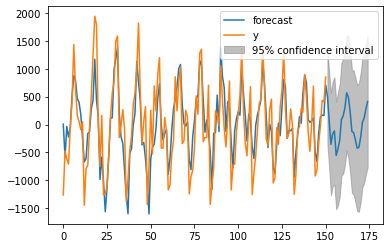

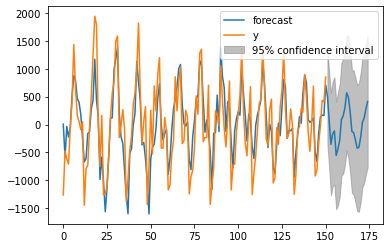

In [279]:
model_fit.plot_predict(0, len(Fort)) # график прогноза по данной модели вместе с доверительными интервалами

### 41. Как же этот прогноз по АРПСС модели соотносится с исходными известными 24 прогнозными точками (ведь прогноз все-таки ретроспективный). Для этого нужно из исходного ряда Fort тоже вычесть линейный тренд и соотнести их на одном изображении:

<Figure size 720x360 with 0 Axes>

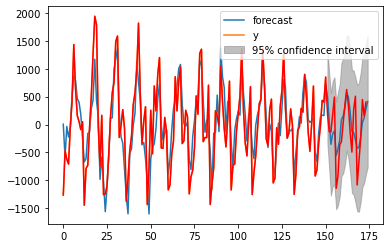

In [280]:
plt.figure(figsize = (10, 5))
model_fit.plot_predict(0, len(Fort)) # прогноз по АРПСС
plt.plot(t0, Fort - reg.predict(t0), 'r') # исходный ВР минус тренд
plt.show()

## 42. Сами прогнозные значения по модели АРПСС можно получить с помощью функции predict:

In [281]:
model_fit.predict(len(Z), len(Fort))

array([ 506.46510802,   69.10443851, -354.28925133, -166.77646882,
       -115.49281554, -554.7249635 , -440.38064296, -284.87179823,
         88.6938655 ,  154.21529979,  302.67021427,  570.02277574,
        489.47022615,  227.20591495, -125.77394984, -145.55808786,
       -275.32382453, -424.80277455, -409.06617609, -229.45251755,
         37.53042409,  119.02621188,  278.20735706,  412.19537591])

## 43. Используйте эти значения для оценки точности прогноза на основе оценок из предыдущей лабораторной работы (все, кроме коэффициентов несоответствия):

In [282]:
print ('Средняя ошибка прогноза: ', abs(np.sum(Fort[-24:])-np.sum(model_fit.predict(len(Z), len(Fort))))/len(Fort[-24:]))

X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-Y[i])**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort[-24:])))

X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-Y[i] ))/Fort[i]

print('Средняя ошибка аппроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка прогноза:  2277.9044191221524
СКВО прогноза:  2325.55385498609
Средняя ошибка аппроксимации:  102.91211665184214


## 44. Также попробуйте построить АРПСС модель для прогнозирования данного ряда, но без исходного вычитания из него линейного тренда:

In [283]:
arimaz = ARIMA(Z, order = (10, 0, 0))
model_fit = arimaz.fit(disp = False)
print(model_fit.summary())

C:\Users\dusta\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  151
Model:                    ARMA(10, 0)   Log Likelihood               -1178.397
Method:                       css-mle   S.D. of innovations            588.205
Date:                Mon, 25 Apr 2022   AIC                           2380.793
Time:                        16:26:07   BIC                           2417.001
Sample:                             0   HQIC                          2395.503
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3133.7587    182.349     17.185      0.000    2776.361    3491.156
ar.L1.y        0.5971      0.081      7.370      0.000       0.438       0.756
ar.L2.y       -0.0996      0.093     -1.069      0.2

### Заметили получившиеся отличия в работе функций Python и точности конечных результатов.

## 45. Аналогично, для данной модели постройте графики прогноза с доверительными интервалами относительно оригинального ряда Fort, а также оцените точность прогноза на основе оценок из пункта 11 выше:

In [284]:
print ('Средняя ошибка прогноза: ',abs(np.sum(Fort[-24:])-np.sum(model_fit.predict(len(Z), len(Fort))))/len(Fort[-24:]))

X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(Fort[i]-Y[i])**2

print('СКВО прогноза: ', np.sqrt(np.sum(X)/len(Fort)))

X = np.zeros(len(Fort))
Y0 = np.zeros(len(Fort)-24)
Y = model_fit.predict(len(Z), len(Fort))
Y=np.hstack((Y0,Y))

for i in range(len(Fort)-24,len(Fort)):
    X[i]=(abs(Fort[i]-Y[i] ))/Fort[i]

print('Средняя ошибка аппроксимации: ', (np.sum(X)*100)/len(Fort[-24:]))

Средняя ошибка прогноза:  711.9030821483024
СКВО прогноза:  321.96414345139993
Средняя ошибка аппроксимации:  40.855829861654136


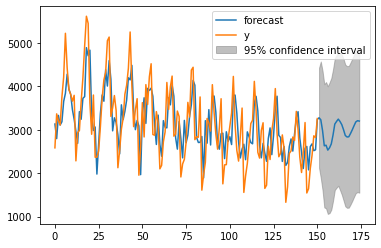

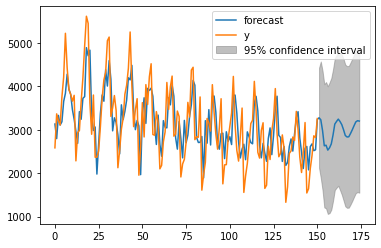

In [285]:
model_fit.plot_predict(0, len(Fort))

## Выводы по работе

В ходе выполнения данной лабораторной работы были изучены подходы к декомпозиции временных рядов на простейшие компоненты, одной из которых является тренд. Кроме того, рассмотрены такие способы построения кривых тренда, как регрессионные методы подгонки, методы скользящего сглаживания, и другие. Изучены методы прогнозирования временных рядов на основе минимизации среднеквадратичной ошибки. 

В общем виде рассмотрена модель авторегрессии – скользящего среднего порядка (p, q) АРПСС (ARIMA). Эта модель временных рядов имеет целый ряд преимуществ в сравнении с другими моделями, одно из которых – это возможность их оперативного прогноза по построенной модели. В связи с этим ни одна методика анализа и изучения временных рядов не может обойтись без рассмотрения подобного класса задач.

В ходе выполнения работы приобретены навыки и умения по применению методик построения и прогнозирования на основе моделей АРПСС (ARIMA). По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.